In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
name_translation = pd.read_csv('product_category_name_translation.csv')


# Traitement du jeu des données 
# 1.Préparer un fichier de commandes par merge
## les varibales concernant customers

In [82]:
customers.head(5)
# 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [83]:
geolocalisation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Merge (customers)

In [84]:
data_customers = customers.merge(geolocalisation, how = 'left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [85]:
data_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
7067805,f529a0fbe1ebd4622fb563b430cac7f5,90db37be54fd796a0fa73b7678e8b795,40150,salvador,BA,40150.0,-12.996229,-38.517446,salvador,BA
13923436,049a364f58c2436196be4378cf9b2ff0,9d863a65fe6121e594e8ecb619766de4,8330,sao paulo,SP,8330.0,-23.616383,-46.468502,são paulo,SP
5598640,c8ab96590456234a5973445b7b25555d,9b2831d500aaa0350abe4fd6a1279c95,13211,jundiai,SP,13211.0,-23.193990,-46.906281,jundiai,SP
12753783,824c433a3dbbdd265a1399583aaef499,6214a3d5f6a00b22e86b9efa44767655,4015,sao paulo,SP,4015.0,-23.586629,-46.642431,são paulo,SP
9890829,f7f386a18c04859490d4df0b71867ca9,f59f412c52fbf5fb82ef139d666cfaf7,36900,manhuacu,MG,36900.0,-20.263892,-42.040663,manhuacu,MG


In [86]:
data_customers.shape

(15083733, 10)

In [87]:
from math import radians, cos, sin, asin, sqrt
# haversine_distance pour calculer les distances entre les clients et enprise Olist

# longitude et latitude de Olist
olist_lat = -25.430572
olist_lon = -49.2920136

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [88]:
data_customers['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                                        for x, y in zip(data_customers.geolocation_lat, 
                                        data_customers.geolocation_lng)]

In [89]:
data_customers.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,harvesine_distance
9933486,cebc1cff5b31ee0ce570b98626a89dc9,568a764e5829149bb3a1d8a9cad5bb7c,20550,rio de janeiro,RJ,20550.0,-22.916487,-43.226306,rio de janeiro,RJ,419.593347
6761005,e0ecd315ca2d6e416ab23f0d6d1e97be,8fb8adf1b150a1afa317fa0e40565b97,28970,araruama,RJ,28970.0,-22.873138,-42.319475,araruama,RJ,473.344191
9947495,be10f8d6a8eaf7abc4b481e668f080ce,5c5d29938f2e541cf631e829dc75c9f4,36500,uba,MG,36500.0,-21.104504,-42.963941,uba,MG,500.186265


## Les varibales concernant les order

In [90]:
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [91]:
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [92]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [93]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### Merge (order)

In [94]:
data_orders =  order_items.merge(order_payments,on='order_id').merge(order_reviews,on='order_id').merge(orders, on ='order_id')

In [95]:
data_orders.shape

(117329, 24)

In [96]:
data_orders.iloc[14]

order_id                         0008288aa423d2a3f00fcb17cd7d8719
order_item_id                                                   2
product_id                       368c6c730842d78016ad823897a372db
seller_id                        1f50f920176fa81dab994f9023523100
shipping_limit_date                           2018-02-21 02:55:52
price                                                        49.9
freight_value                                               13.37
payment_sequential                                              1
payment_type                                               boleto
payment_installments                                            1
payment_value                                              126.54
review_id                        5505c1cce299b1e0b3f8e4b428417362
review_score                                                    5
review_comment_title                                          NaN
review_comment_message                                        NaN
review_cre

### Merge (customers + order)

In [97]:
data_customers_order = data_orders.merge(data_customers,on='customer_id')

In [98]:
data_customers_order.head(2)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,harvesine_distance
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,564.799351
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013.0,-21.758843,-41.306754,campos dos goytacazes,RJ,565.106547


In [99]:
data_customers_order.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'harvesine_distance'],
      dtype='object')

In [100]:
a = data_customers_order.loc[data_customers_order['customer_unique_id']== '0000366f3b9a7992bf8c76cfdf3221e2']

In [101]:
a

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,harvesine_distance
15808462,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.335331,-46.828647,cajamar,SP,211.947029
15808463,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.337801,-46.919983,cajamar,SP,207.667095
15808464,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.343670,-46.824528,cajamar,SP,211.740527
15808465,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.336104,-46.829195,cajamar,SP,211.885147
15808466,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.338572,-46.826739,cajamar,SP,211.880693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15808523,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.348433,-46.826243,cajamar,SP,211.435670
15808524,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.334254,-46.829391,cajamar,SP,211.964128
15808525,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.348433,-46.826243,cajamar,SP,211.435670
15808526,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.0,1,credit_card,8,...,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,7787.0,-23.335784,-46.829117,cajamar,SP,211.903904


### merge (product)

In [102]:
name_translation.head(2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [103]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [104]:
data_products = products.merge(name_translation, on ='product_category_name')

### Merge (customer + order + product)

In [105]:
data_customers_order_product = data_customers_order.merge(data_products, on ='product_id')

In [106]:
data_customers_order_product.shape

(17659175, 43)

## les variables non interssants

In [107]:
sellers.head(2)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


# 2. sélectrion des varaibles et traitement des valeurs manquantes

In [108]:
data_customers_order_product.isnull().sum()

order_id                                0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
review_id                               0
review_score                            0
review_comment_title             15654106
review_comment_message           10381981
review_creation_date                    0
review_answer_timestamp                 0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    2825
order_delivered_carrier_date       183710
order_delivered_customer_date      344016
order_estimated_delivery_date     

## On ne conserve que les variables bien rempli(supprimer les variables sur les comments des commande) et semble utilisable (il y a trop de colonnes pour la localisation des clients)
       'order_id',  
       'product_id', 
       'customer_unique_id', 
       'price', 
       'payment_value', 
       'review_score', 
       'order_status', 
       'order_purchase_timestamp', 
       'order_approved_at',
       'harvesine_distance', 
       'product_category_name_english'
       'payment_value'

In [109]:
new_data = data_customers_order_product[['order_id',  
                                        'product_id', 
                                        'customer_unique_id', 
                                        'price', 
                                        'payment_value', 
                                        'review_score', 
                                        'order_status', 
                                        'order_purchase_timestamp', 
                                        'order_approved_at',
                                        'harvesine_distance', 
                                        'product_category_name_english']]

In [110]:
new_data.product_category_name_english.unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto',
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'cine_p

In [111]:
new_data.isnull().sum()

order_id                            0
product_id                          0
customer_unique_id                  0
price                               0
payment_value                       0
review_score                        0
order_status                        0
order_purchase_timestamp            0
order_approved_at                2825
harvesine_distance                310
product_category_name_english       0
dtype: int64

### Supprimer les ligne qui présente les valeurs manquante (order_approved_at ) et coserver les ligne pour les commandes delivered

In [112]:
new_data = new_data.loc[new_data['order_status'] == 'delivered', :]

In [113]:
new_data = new_data.dropna(subset=['order_approved_at', 'harvesine_distance'])

In [114]:
new_data.isnull().sum()


order_id                         0
product_id                       0
customer_unique_id               0
price                            0
payment_value                    0
review_score                     0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
harvesine_distance               0
product_category_name_english    0
dtype: int64

####  groupby (product category names)

In [115]:
categories = new_data.product_category_name_english.unique()
categories

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto',
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'cine_p

In [116]:
new_data_cate = new_data.groupby(by="customer_unique_id").agg({'product_category_name_english': lambda x: list(x)})

In [117]:
from collections import Counter

def count_nb_items_of_category(x):
    l = list()
    counter = Counter(x)
    for cat in categories:
        if counter.get(cat) is not None:
            l.append((cat, counter.get(cat)))
        else:
            l.append((cat, 0))
    return l

In [118]:
from statistics import mode


new_data_cate['cate_list'] = new_data_cate.product_category_name_english.apply(lambda x:mode(x))

In [119]:
from statistics import mode
new_data_cate

,product_category_name_english,cate_list
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,"[bed_bath_table, bed_bath_table, bed_bath_tabl...",bed_bath_table
0000b849f77a49e4a4ce2b2a4ca5be3f,"[health_beauty, health_beauty, health_beauty, ...",health_beauty
0000f46a3911fa3c0805444483337064,"[stationery, stationery, stationery, stationer...",stationery
0000f6ccb0745a6a4b88665a16c9f078,"[telephony, telephony, telephony, telephony, t...",telephony
0004aac84e0df4da2b147fca70cf8255,"[telephony, telephony, telephony, telephony, t...",telephony
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,"[health_beauty, health_beauty, health_beauty, ...",health_beauty
fffea47cd6d3cc0a88bd621562a9d061,"[baby, baby, baby, baby, baby, baby, baby, bab...",baby
ffff371b4d645b6ecea244b27531430a,"[auto, auto, auto, auto, auto, auto, auto, aut...",auto


# #RFM (Récence : durée depuis la dernière commande, Fréquence : nombre de commandes, Montant: par exemple montant cumulé des commandes)
### Recency

In [120]:
new_data.sample(3)

,order_id,product_id,customer_unique_id,price,payment_value,review_score,order_status,order_purchase_timestamp,order_approved_at,harvesine_distance,product_category_name_english
8443363,6f3257f5d312b32a49d12e934af13545,b24af8bca8813bcde4140ff8562f5e47,6fb1f07f50322ace5e510c059089c409,49.99,67.05,2,delivered,2018-04-25 23:43:05,2018-04-26 23:49:37,808.647379,telephony
2116206,5c7fb4191236c0b1404e9e97af9691c9,9d8a0e115e802d845b4ce1eb794d1260,e184051e38203f61efc1b87fef5ea173,120.00,128.26,1,delivered,2017-10-10 17:14:09,2017-10-10 17:35:55,390.674131,sports_leisure
8801932,7146225dc080fb528c5c9571a11feca5,00ba6d766f0b1d7b78a5ce3e1e033263,2ba28f488c8538ba907973e7f264a993,43.00,128.36,5,delivered,2017-12-15 18:35:32,2017-12-15 18:51:20,190.484567,housewares


In [121]:
new_data = new_data.astype({"order_purchase_timestamp": np.datetime64, "order_approved_at": np.datetime64})

In [122]:
new_data.dtypes

order_id                                 object
product_id                               object
customer_unique_id                       object
price                                   float64
payment_value                           float64
review_score                              int64
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
harvesine_distance                      float64
product_category_name_english            object
dtype: object

In [123]:
df_recency = new_data.groupby(by='customer_unique_id',
                        as_index=False)['order_approved_at'].max()
df_recency.columns = ['customer_unique_id', 'order_approved_at']
recent_date = df_recency['order_approved_at'].max()
df_recency['Recency'] = df_recency['order_approved_at'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,customer_unique_id,order_approved_at,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,113
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,287


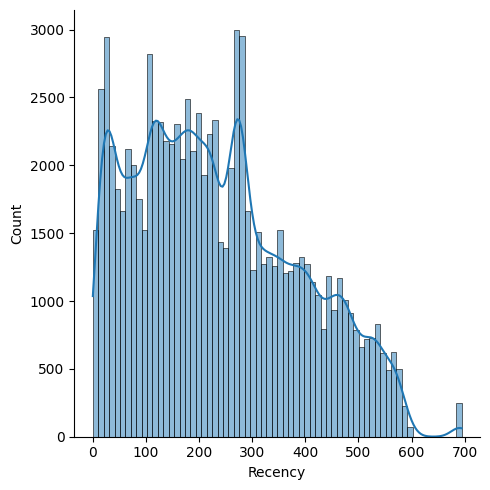

In [146]:
# Recency distribution plot
ax_recency = sns.displot(data =df_recency, x = 'Recency', kde=True)

#### Frequency

In [125]:
frequency_df = new_data.drop_duplicates().groupby(
    by=['customer_unique_id'], as_index=False)['order_approved_at'].count()
frequency_df.columns = ['customer_unique_id', 'Frequency']
frequency_df.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,51
1,0000b849f77a49e4a4ce2b2a4ca5be3f,60
2,0000f46a3911fa3c0805444483337064,74
3,0000f6ccb0745a6a4b88665a16c9f078,28
4,0004aac84e0df4da2b147fca70cf8255,102


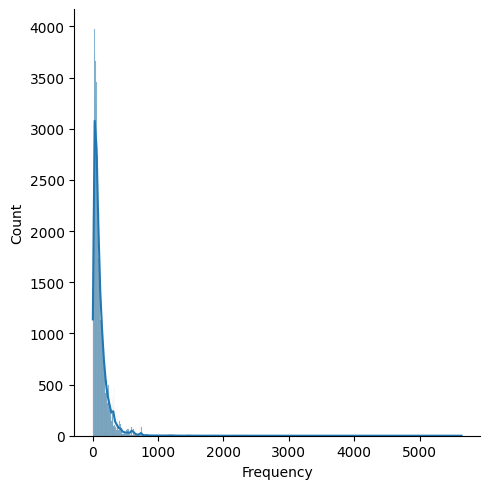

In [147]:
# Frequency distribution plot
ax_frequency = sns.displot(data =frequency_df, x = 'Frequency', kde=True)

#### Monetary Value

In [127]:

monetary_df = new_data.groupby(by='customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,9365.40
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3915.36
2,0000f46a3911fa3c0805444483337064,10087.74
3,0000f6ccb0745a6a4b88665a16c9f078,1395.84
4,0004aac84e0df4da2b147fca70cf8255,26186.37


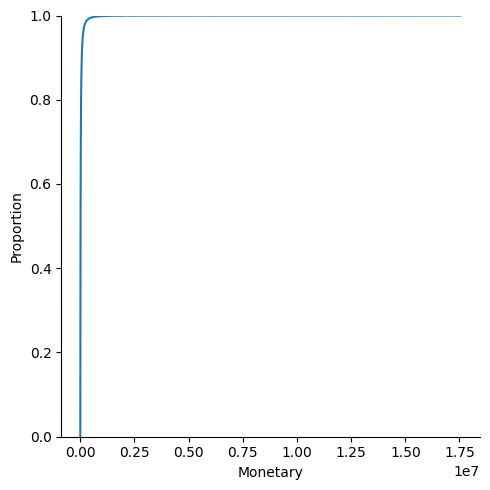

In [151]:
# Monetary distribution plot
ax_monetary = sns.displot(data = monetary_df, x = 'Monetary', kind="ecdf")

### RFM merge

In [129]:
rfm_df = df_recency.merge(frequency_df, on='customer_unique_id').merge(monetary_df, on='customer_unique_id')

In [130]:
rfm_df

,customer_unique_id,order_approved_at,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,111,51,9365.40
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,113,60,3915.36
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536,74,10087.74
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,320,28,1395.84
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,287,102,26186.37
...,...,...,...,...,...
91216,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,446,14,57887.76
91217,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,261,55,6089.76
91218,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,567,52,6185.30
91219,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,118,35,5347.60


### RFM segmentation

In [167]:
#Split into four segments using quantiles
RFMScores = rfm_df.loc[:,["customer_unique_id","Recency","Frequency","Monetary"]]
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [168]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [170]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,111,51,9365.40,1,3,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,113,60,3915.36,2,3,4
2,0000f46a3911fa3c0805444483337064,536,74,10087.74,4,3,3
3,0000f6ccb0745a6a4b88665a16c9f078,320,28,1395.84,3,4,4
4,0004aac84e0df4da2b147fca70cf8255,287,102,26186.37,3,2,2


In [171]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,111,51,9365.40,1,3,3,133,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,113,60,3915.36,2,3,4,234,9
2,0000f46a3911fa3c0805444483337064,536,74,10087.74,4,3,3,433,10
3,0000f6ccb0745a6a4b88665a16c9f078,320,28,1395.84,3,4,4,344,11
4,0004aac84e0df4da2b147fca70cf8255,287,102,26186.37,3,2,2,322,7


In [172]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,index,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,0000366f3b9a7992bf8c76cfdf3221e2,111,51,9365.40,1,3,3,133,7,Gold
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,113,60,3915.36,2,3,4,234,9,Silver
2,2,0000f46a3911fa3c0805444483337064,536,74,10087.74,4,3,3,433,10,Bronze
3,3,0000f6ccb0745a6a4b88665a16c9f078,320,28,1395.84,3,4,4,344,11,Bronze
4,4,0004aac84e0df4da2b147fca70cf8255,287,102,26186.37,3,2,2,322,7,Gold


In [173]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,53803,96e91c0dba30f7ff60c9acd47677c248,41,142,6746388.48,1,1,1,111,3,Platinum
1,20532,397b44d5bb99eabf54ea9c2b41ebb905,72,2289,3786549.14,1,1,1,111,3,Platinum
2,66306,b9cc54385a16364650ea5c9d26c212d9,104,466,3716577.36,1,1,1,111,3,Platinum
3,62103,adfa1cab2b2c8706db21bb13c0a1beb1,88,282,3657923.52,1,1,1,111,3,Platinum
4,57843,a229eba70ec1c2abef51f04987deb7a5,87,302,3387471.00,1,1,1,111,3,Platinum
5,13824,26b5839e505ee33e6a449f7c2c403f99,88,308,2745265.77,1,1,1,111,3,Platinum
6,71471,c8460e4251689ba205045f3ea17884a1,20,276,2737675.08,1,1,1,111,3,Platinum
7,860,026cc430843b605b4b5515751f4fe5d3,54,380,2620771.20,1,1,1,111,3,Platinum
8,52136,9271b12d584732342f9ab94f9f08dddb,111,312,2229662.16,1,1,1,111,3,Platinum
9,68178,bef3ce10ea5715fbcbcbe3b266ee94c5,95,239,2124233.37,1,1,1,111,3,Platinum


In [182]:
#  customer quantities
from collections import Counter
number_Loyalty_Level = RFMScores.loc[:, "RFM_Loyalty_Level"] 
Counter(number_Loyalty_Level)

Counter({'Gold': 12884, 'Silver': 25583, 'Bronze': 19792, 'Platinum': 32962})

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

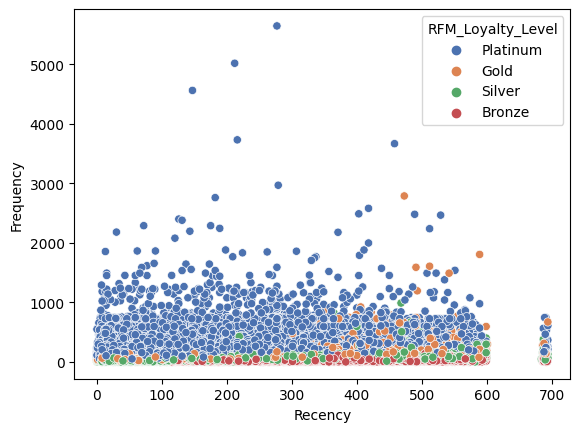

In [175]:
# scatter plot 
sns.scatterplot(data=RFMScores, x="Recency", y="Frequency", hue="RFM_Loyalty_Level", palette="deep")

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

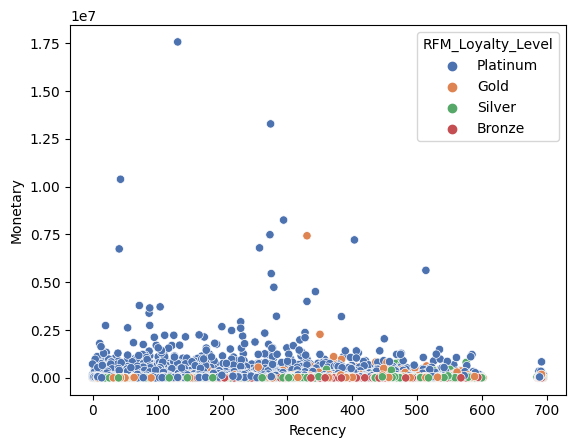

In [176]:
sns.scatterplot(data=RFMScores, x="Recency", y="Monetary", hue="RFM_Loyalty_Level", palette="deep")

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

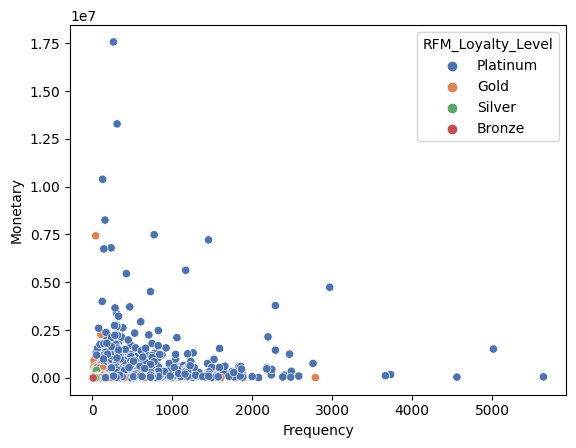

In [177]:
sns.scatterplot(data=RFMScores, x="Frequency", y="Monetary", hue="RFM_Loyalty_Level", palette="deep")

### Review_score_mean 

In [132]:
review_score_mean_df = new_data.groupby(by='customer_unique_id', as_index=False)['review_score'].mean()
review_score_mean_df.columns = ['customer_unique_id', 'review_score_mean']
review_score_mean_df.head()

,customer_unique_id,review_score_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0


In [133]:
review_score_mean_df.shape

(91221, 2)

### harvesine_distance

In [134]:
Distance_df = new_data.groupby(by='customer_unique_id', as_index=False)['harvesine_distance'].mean()
Distance_df.columns = ['customer_unique_id', 'harvesine_distance_mean']
Distance_df.head()

,customer_unique_id,harvesine_distance_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,211.646795
1,0000b849f77a49e4a4ce2b2a4ca5be3f,203.598680
2,0000f46a3911fa3c0805444483337064,151.416708
3,0000f6ccb0745a6a4b88665a16c9f078,1666.128258
4,0004aac84e0df4da2b147fca70cf8255,175.440151


In [135]:
Distance_df.shape

(91221, 2)

### review_score_mean_df + Distance_df+ rfm_df + product

In [136]:
data_final = rfm_df.merge(review_score_mean_df, on='customer_unique_id').merge(Distance_df, on='customer_unique_id').merge(new_data_cate, on='customer_unique_id')

In [137]:
data_final.tail()


,customer_unique_id,order_approved_at,Recency,Frequency,Monetary,review_score_mean,harvesine_distance_mean,product_category_name_english,cate_list
91216,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,446,14,57887.76,5.0,1445.366958,"[health_beauty, health_beauty, health_beauty, ...",health_beauty
91217,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,261,55,6089.76,4.0,1133.766533,"[baby, baby, baby, baby, baby, baby, baby, bab...",baby
91218,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,567,52,6185.30,5.0,1022.533976,"[auto, auto, auto, auto, auto, auto, auto, aut...",auto
91219,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,118,35,5347.60,5.0,567.107916,"[watches_gifts, watches_gifts, watches_gifts, ...",watches_gifts
91220,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-03 15:15:13,482,10,858.72,5.0,9.400679,"[perfumery, perfumery, perfumery, perfumery, p...",perfumery


In [139]:
data_final.isnull().sum()

customer_unique_id               0
order_approved_at                0
Recency                          0
Frequency                        0
Monetary                         0
review_score_mean                0
harvesine_distance_mean          0
product_category_name_english    0
cate_list                        0
dtype: int64

In [138]:
import joblib

joblib.dump(data_final, 'data_final.joblib')

['data_final.joblib']